<a href="https://colab.research.google.com/github/momna763/DIP/blob/main/DIP_LAB08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

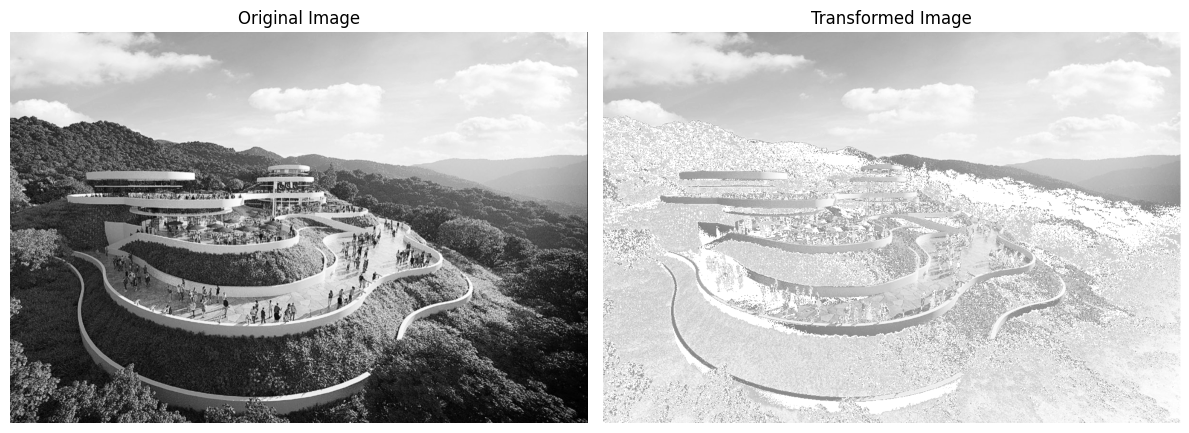

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def transform_image(image_array):
    normalized_image = image_array / 255.0
    transformed_image = np.piecewise(
        normalized_image,
        [normalized_image <= 0.25, (normalized_image > 0.25) & (normalized_image <= 0.5), normalized_image > 0.5],
        [lambda x: 1 - x, 1, lambda x: x]
    )
    return (transformed_image * 255).astype(np.uint8)

input_image_path = "download.jpeg"
image = Image.open(input_image_path).convert("L")

image_array = np.array(image)

transformed_image_array = transform_image(image_array)

transformed_image = Image.fromarray(transformed_image_array)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_array, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(transformed_image_array, cmap="gray", vmin=0, vmax=255)
axes[1].set_title("Transformed Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

output_image_path = "transformed_image.jpg"
transformed_image.save(output_image_path)


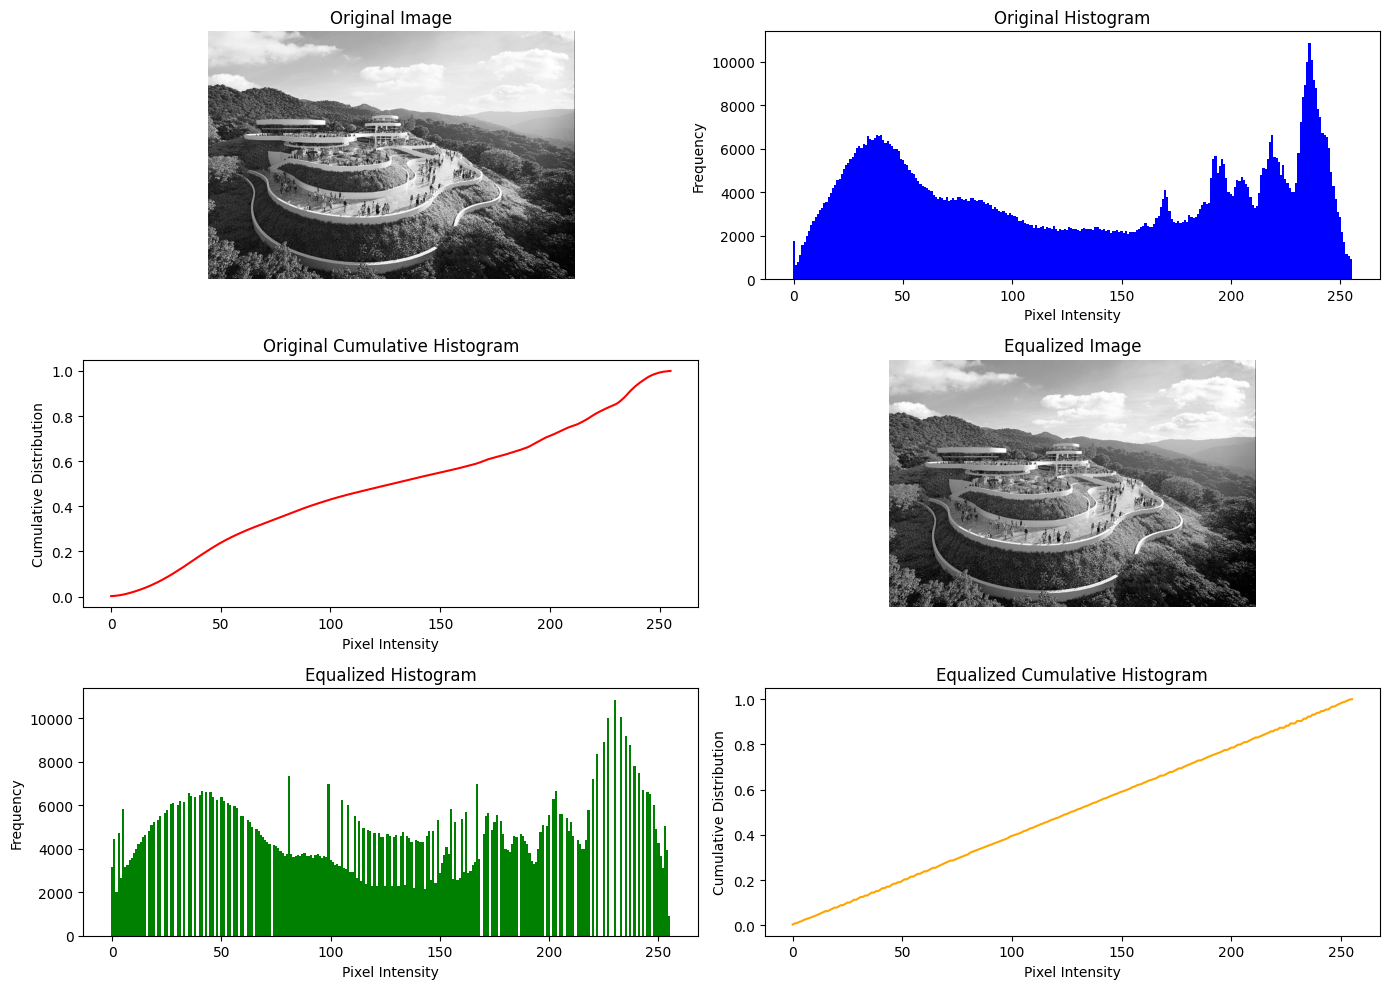

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def myhist_equ(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Validate image loading
    if image is None:
        print("Image not found or unable to load!")
        return

    # Get image dimensions
    rows, cols = image.shape
    total_pixels = rows * cols

    # Calculate the histogram of the image
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.ravel():
        histogram[pixel_value] += 1

    # Compute the normalized cumulative distribution function (CDF)
    cdf = np.cumsum(histogram) / total_pixels
    cdf_normalized = (cdf * 255).astype(np.uint8)

    # Equalize the image using the normalized CDF
    equalized_image = cdf_normalized[image]

    # Calculate histogram of equalized image
    equalized_histogram = np.zeros(256, dtype=int)
    for pixel_value in equalized_image.ravel():
        equalized_histogram[pixel_value] += 1

    # Compute the CDF for the equalized image
    equalized_cdf = np.cumsum(equalized_histogram) / total_pixels

    # Plot the results
    plt.figure(figsize=(14, 10))

    # Input Image and its Histogram
    plt.subplot(3, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.title("Original Histogram")
    plt.bar(range(256), histogram, color='blue', width=1)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Original Cumulative Histogram
    plt.subplot(3, 2, 3)
    plt.title("Original Cumulative Histogram")
    plt.plot(range(256), cdf, color='red')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Cumulative Distribution")

    # Equalized Image and its Histogram
    plt.subplot(3, 2, 4)
    plt.title("Equalized Image")
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.title("Equalized Histogram")
    plt.bar(range(256), equalized_histogram, color='green', width=1)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Equalized Cumulative Histogram
    plt.subplot(3, 2, 6)
    plt.title("Equalized Cumulative Histogram")
    plt.plot(range(256), equalized_cdf, color='orange')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Cumulative Distribution")

    plt.tight_layout()
    plt.show()

image_path = 'download.jpeg'
myhist_equ(image_path)


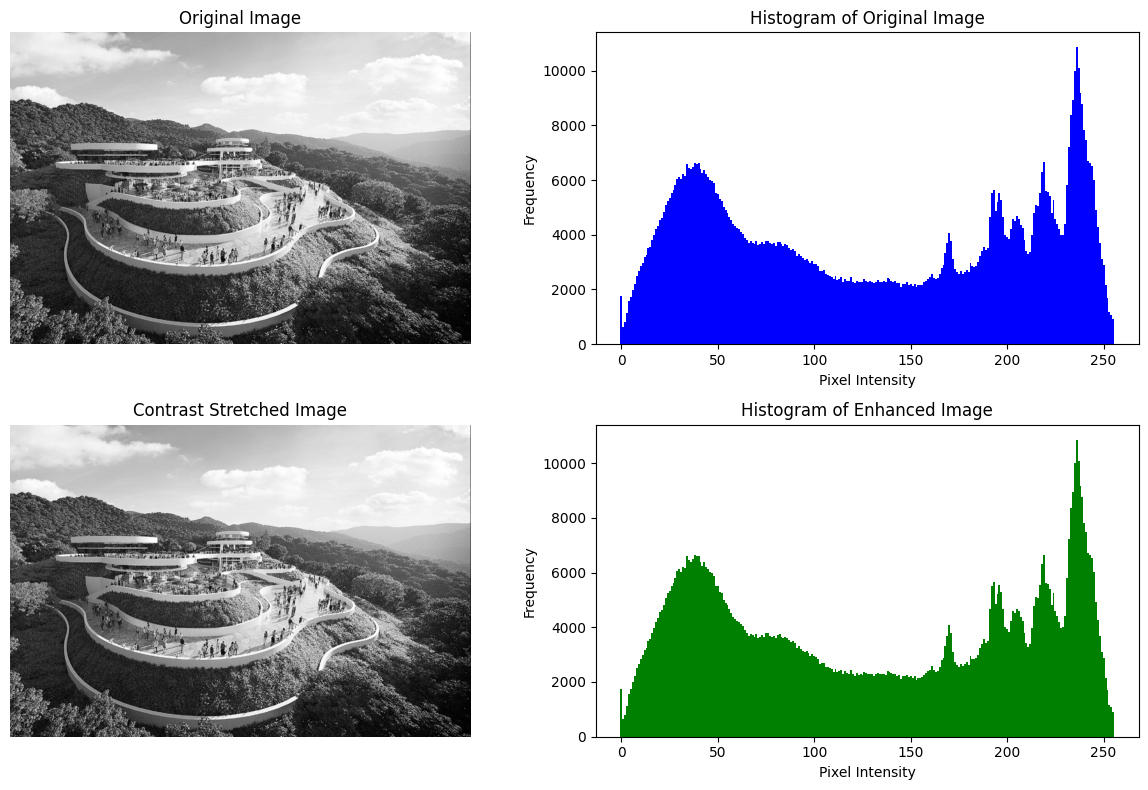

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrastStretch(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Validate image loading
    if image is None:
        print("Image not found or unable to load!")
        return

    # Find the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Perform contrast stretching
    stretched_image = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    # Calculate histograms
    original_histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    stretched_histogram, _ = np.histogram(stretched_image.flatten(), bins=256, range=[0, 256])

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Original Image and its Histogram
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title("Histogram of Original Image")
    plt.bar(range(256), original_histogram, color='blue', width=1)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Stretched Image and its Histogram
    plt.subplot(2, 2, 3)
    plt.title("Contrast Stretched Image")
    plt.imshow(stretched_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title("Histogram of Enhanced Image")
    plt.bar(range(256), stretched_histogram, color='green', width=1)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

image_path = 'download.jpeg'
contrastStretch(image_path)

